<a href="https://colab.research.google.com/github/mohammedrashithkp/PythonProjects/blob/main/mlfcc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setting Up


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [8]:


cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv('magic04.data',names=cols)
df.head()


fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [9]:
df["class"]=(df["class"]=="g").astype(int)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

## Plotting Datas

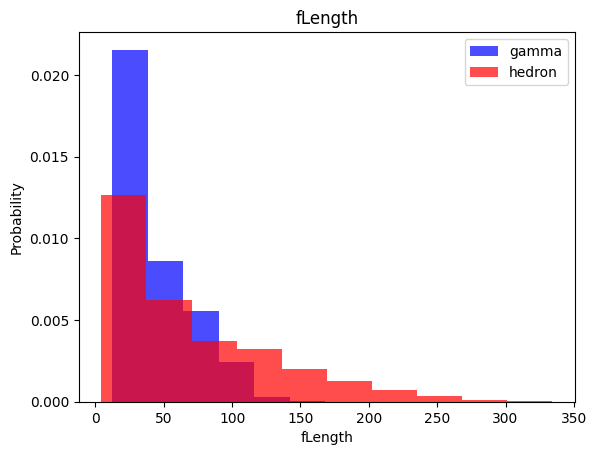

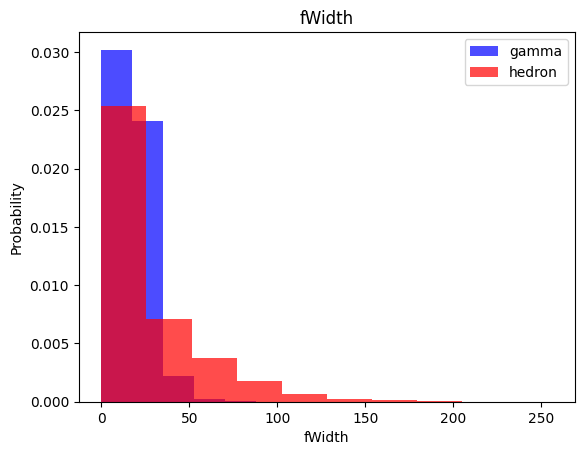

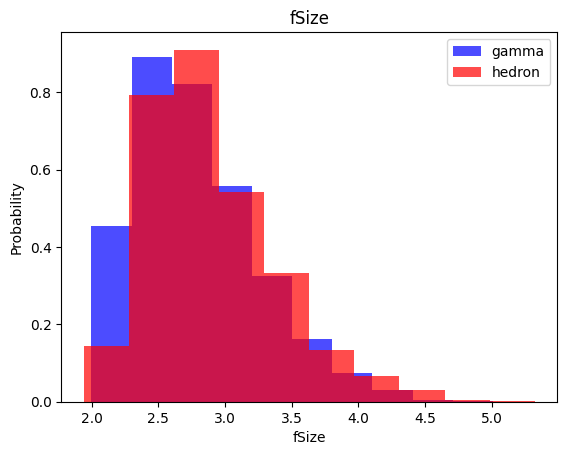

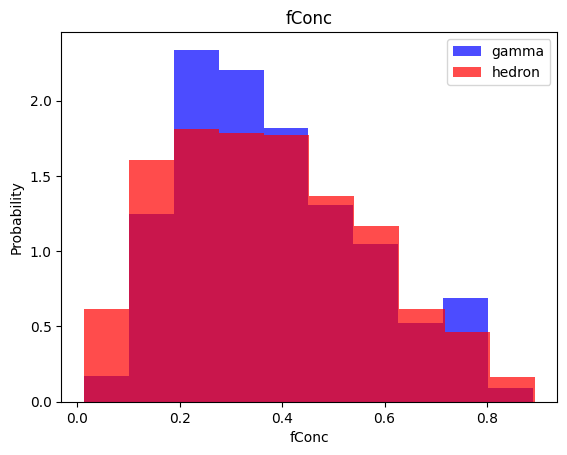

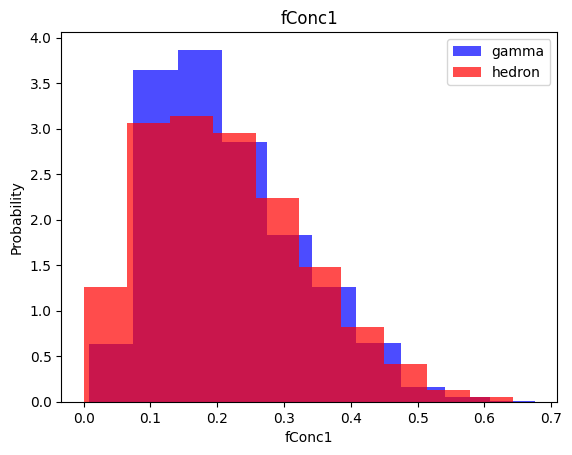

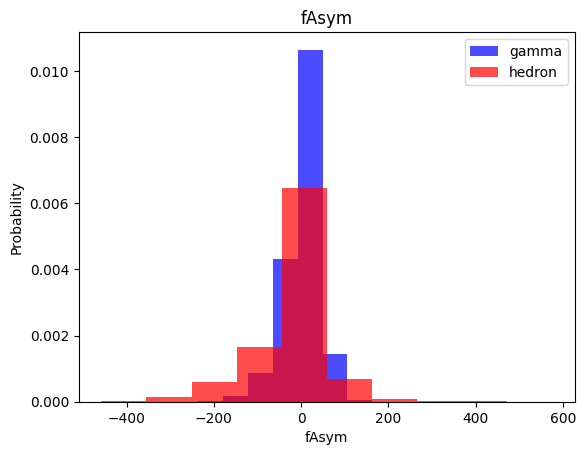

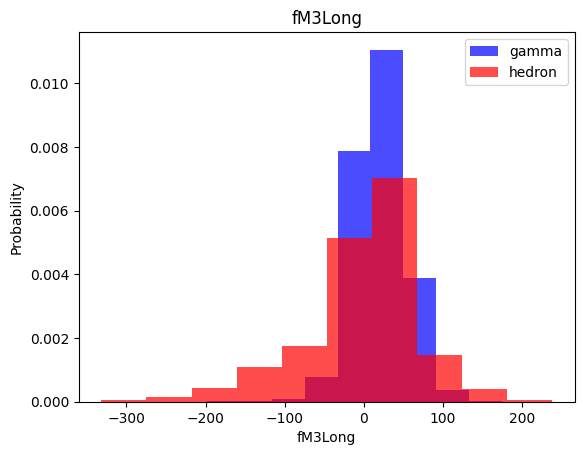

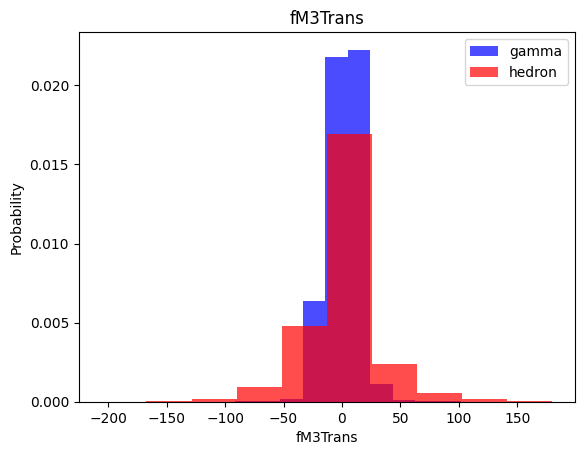

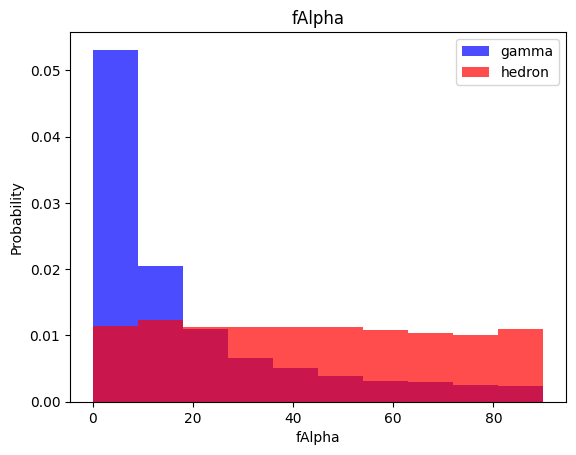

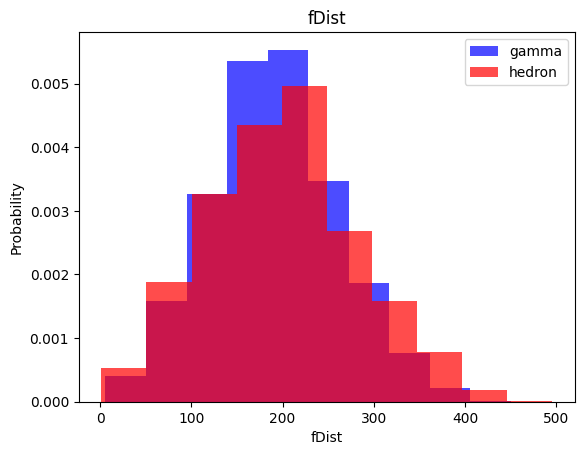

In [10]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label],color='red',label='hedron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Test ,Train and Validate Datasets

In [15]:
train,test,valid=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


##Logic
- scaling is done to limit datas into an uniform range.

- oversampling is done to keep the make up for certain datas in the train dataset

- After doing it seperately we are stacking it side by side using hpstack

In [16]:
def scale_dataset(dataframe,oversample=False):
  dataframe = pd.DataFrame(dataframe)
  X = dataframe[dataframe.columns[:-1]].values
  Y = dataframe[dataframe.columns[-1]].values
  scaler=StandardScaler()

  X = scaler.fit_transform(X)

  if oversample:
    ros=RandomOverSampler()
    X,Y=ros.fit_resample(X,Y)

  data =np.hstack((X,np.reshape(Y,(-1,1))))
  return data,X,Y

In [17]:
train,X_train,Y_train = scale_dataset(train,oversample=True)
test,X_test,Y_test = scale_dataset(test,oversample=False)
valid,X_valid,Y_valid = scale_dataset(valid,oversample=False)

In [18]:
# print(len(X_train))
# print(len(Y_train))
# print(sum(Y_train == 0))
# print(sum(Y_train == 1))

# K-Nearest Neighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,Y_train)

KNeighborsClassifier()

In [20]:
Y_pred = knn_model.predict(X_test)

In [21]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1353
           1       0.86      0.85      0.85      2451

    accuracy                           0.81      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model= nb_model.fit(X_train,Y_train)

In [24]:
Y_pred = nb_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.67      0.41      0.51      1353
           1       0.73      0.89      0.80      2451

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
lg_model=LogisticRegression()
lg_model= lg_model.fit(X_train,Y_train)
Y_pred = lg_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1353
           1       0.84      0.81      0.83      2451

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# Support Vector machines

In [27]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model= svm_model.fit(X_train,Y_train)
Y_pred = svm_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1353
           1       0.89      0.90      0.90      2451

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Networks

## Plotting Data from Tensorflow Operations

In [40]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Plot loss
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel("Binary crossentropy")
    ax1.legend()
    ax1.grid(True)

    # Plot accuracy
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel("Accuracy")
    ax2.legend()
    ax2.grid(True)

    plt.show()

##Making an network
Dropout layers are layers that we ignore to prevent overfitting
## Training Data
- validation_split = 0.2
- epoch =100
- batch =32
> means the model will see the same data 100 times in batch of 32 and everytime 20% of the data will be taken for validation

In [38]:
import tensorflow as tf

def train_model(X_train,Y_train,num_nodes,dropout_prob,learning_rate,batch_size,epochs):
  nn_model=tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes,activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1,activation='sigmoid')])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),loss='binary_crossentropy',metrics=['accuracy'])
  history = nn_model.fit(X_train,Y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2)
  return nn_model,history

16 nodes, 0 dropout,0.1 lr, 32 batch


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7720 - loss: 0.4710 - val_accuracy: 0.6948 - val_loss: 0.6164
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8363 - loss: 0.3920 - val_accuracy: 0.6497 - val_loss: 0.6307
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8351 - loss: 0.3832 - val_accuracy: 0.4610 - val_loss: 0.8192
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8341 - loss: 0.3834 - val_accuracy: 0.6599 - val_loss: 0.6121
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8468 - loss: 0.3684 - val_accuracy: 0.6833 - val_loss: 0.5192
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8484 - loss: 0.3634 - val_accuracy: 0.6592 - val_loss: 0.5175
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8470 - loss: 0.3680 - val_accuracy: 0.6887 - val_loss: 0.5840
Epoch 8/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8526 - loss: 0.3591 - val_accu

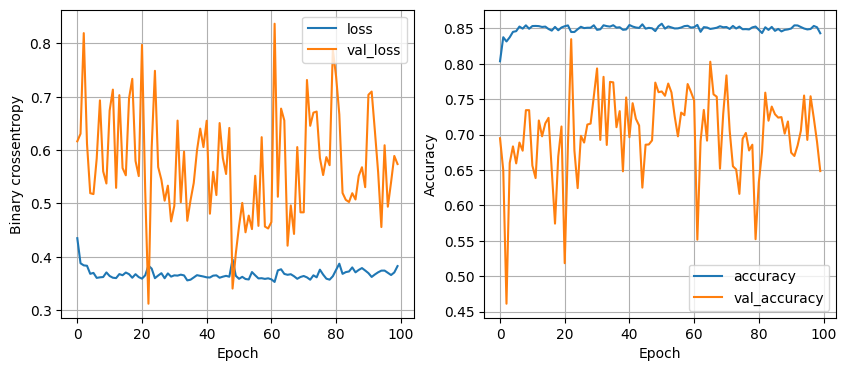

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8411 - loss: 0.4046
16 nodes, 0 dropout,0.1 lr, 64 batch
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7795 - loss: 0.4606 - val_accuracy: 0.6948 - val_loss: 0.4874
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8395 - loss: 0.3715 - val_accuracy: 0.6941 - val_loss: 0.6060
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8498 - loss: 0.3547 - val_accuracy: 0.7280 - val_loss: 0.4145
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8422 - loss: 0.3631 - val_accuracy: 0.6192 - val_loss: 0.6385
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8425 - loss: 0.3634 - val_accuracy: 0.5847 - val_loss: 0.8446
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8492 - loss: 0.3618 - val_accuracy: 0.7114 - val_loss: 0.5432
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8543 - loss: 0.3414 - val_accuracy: 0.7649 - va

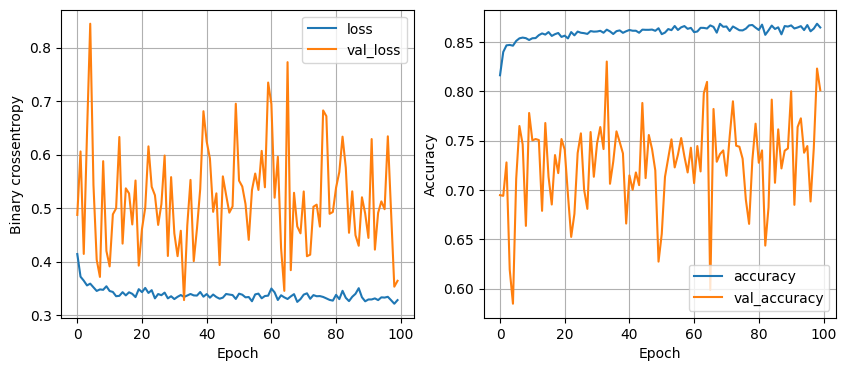

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8484 - loss: 0.3776
16 nodes, 0 dropout,0.1 lr, 128 batch
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7667 - loss: 0.4787 - val_accuracy: 0.7412 - val_loss: 0.5347
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8378 - loss: 0.3903 - val_accuracy: 0.7016 - val_loss: 0.4677
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8386 - loss: 0.3617 - val_accuracy: 0.7121 - val_loss: 0.5147
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8506 - loss: 0.3510 - val_accuracy: 0.6904 - val_loss: 0.4801
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8549 - loss: 0.3449 - val_accuracy: 0.5955 - val_loss: 0.7526
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8454 - loss: 0.3555 - val_accuracy: 0.6944 - val_loss: 0.5302
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8579 - loss: 0.3332 - val_accuracy: 0.7209 - val_loss: 0.584

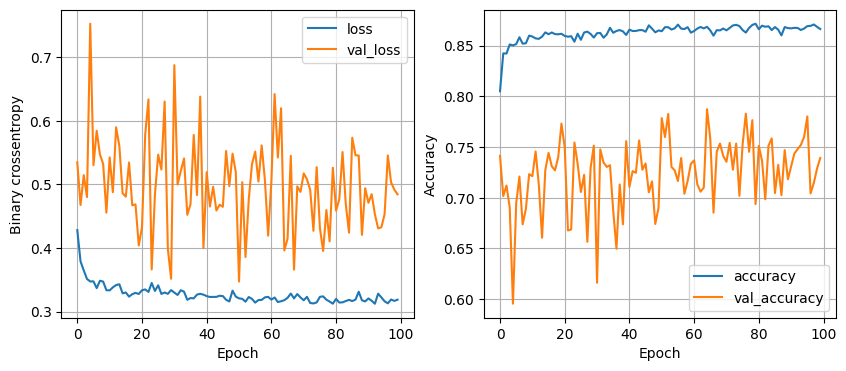

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8557 - loss: 0.3590
16 nodes, 0 dropout,0.005 lr, 32 batch
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7652 - loss: 0.4726 - val_accuracy: 0.6826 - val_loss: 0.6027
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8483 - loss: 0.3556 - val_accuracy: 0.7442 - val_loss: 0.4974
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8625 - loss: 0.3358 - val_accuracy: 0.7168 - val_loss: 0.5594
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8662 - loss: 0.3301 - val_accuracy: 0.7409 - val_loss: 0.4875
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8623 - loss: 0.3284 - val_accuracy: 0.7612 - val_loss: 0.4583
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8696 - loss: 0.3200 - val_accuracy: 0.7293 - val_loss: 0.5123
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8632 - loss: 0.3247 - val_accuracy: 0.7530 - 

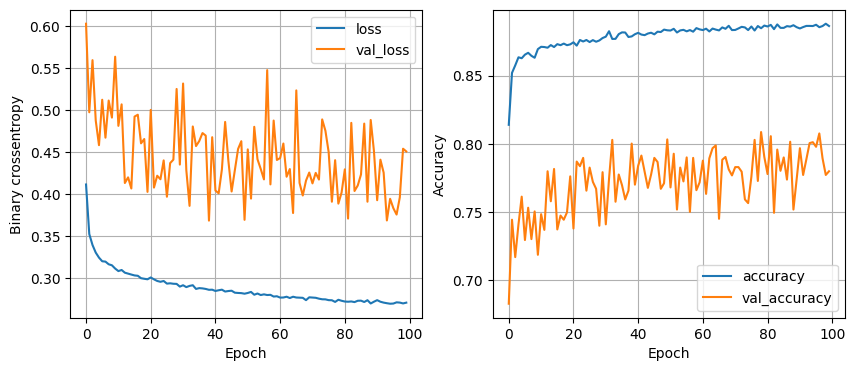

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8664 - loss: 0.3296
16 nodes, 0 dropout,0.005 lr, 64 batch
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7143 - loss: 0.5276 - val_accuracy: 0.7398 - val_loss: 0.5164
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8326 - loss: 0.3811 - val_accuracy: 0.7141 - val_loss: 0.5514
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8474 - loss: 0.3630 - val_accuracy: 0.7073 - val_loss: 0.5857
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8609 - loss: 0.3316 - val_accuracy: 0.7646 - val_loss: 0.4610
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8670 - loss: 0.3217 - val_accuracy: 0.7178 - val_loss: 0.5045
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8610 - loss: 0.3268 - val_accuracy: 0.7639 - val_loss: 0.4353
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8658 - loss: 0.3156 - val_accuracy: 0.7229 - 

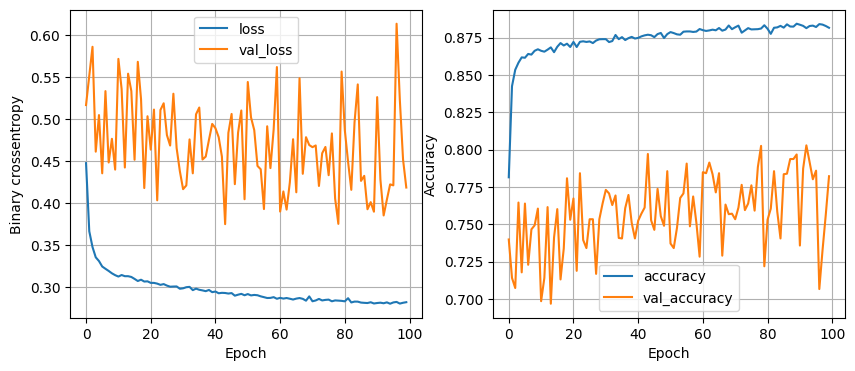

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8756 - loss: 0.3233
16 nodes, 0 dropout,0.005 lr, 128 batch
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7397 - loss: 0.5357 - val_accuracy: 0.6646 - val_loss: 0.5959
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8248 - loss: 0.3927 - val_accuracy: 0.7436 - val_loss: 0.5129
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8536 - loss: 0.3553 - val_accuracy: 0.7686 - val_loss: 0.4551
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8513 - loss: 0.3535 - val_accuracy: 0.7551 - val_loss: 0.4705
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8548 - loss: 0.3408 - val_accuracy: 0.7348 - val_loss: 0.5040
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8544 - loss: 0.3393 - val_accuracy: 0.7683 - val_loss: 0.4412
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8566 - loss: 0.3340 - val_accuracy: 0.7547 - val_loss: 0.4

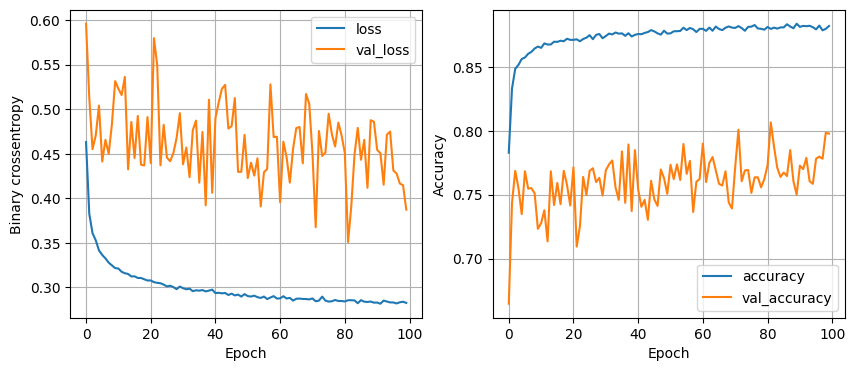

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8693 - loss: 0.3269
16 nodes, 0 dropout,0.001 lr, 32 batch
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6992 - loss: 0.5854 - val_accuracy: 0.6203 - val_loss: 0.6187
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8035 - loss: 0.4154 - val_accuracy: 0.6728 - val_loss: 0.5946
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8250 - loss: 0.3932 - val_accuracy: 0.7273 - val_loss: 0.5402
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8481 - loss: 0.3718 - val_accuracy: 0.7124 - val_loss: 0.5603
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8465 - loss: 0.3713 - val_accuracy: 0.7039 - val_loss: 0.5859
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8565 - loss: 0.3498 - val_accuracy: 0.7571 - val_loss: 0.4880
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8528 - loss: 0.3609 - val_accuracy: 0.7178 - 

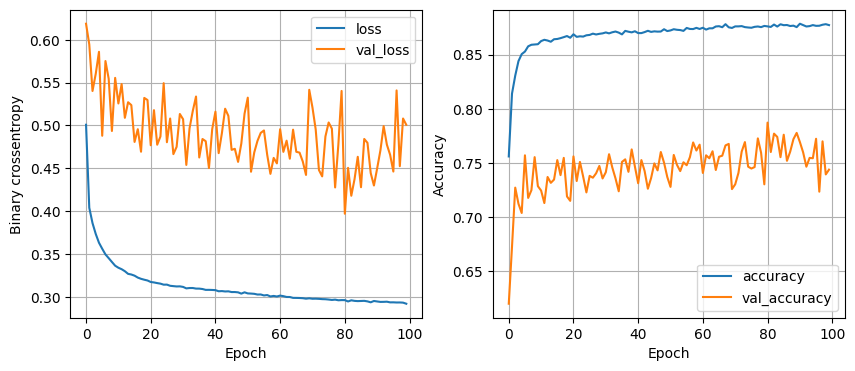

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8602 - loss: 0.3224
16 nodes, 0 dropout,0.001 lr, 64 batch
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6777 - loss: 0.6130 - val_accuracy: 0.6148 - val_loss: 0.6859
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7963 - loss: 0.4316 - val_accuracy: 0.6579 - val_loss: 0.6019
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8079 - loss: 0.4132 - val_accuracy: 0.6494 - val_loss: 0.6101
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8160 - loss: 0.3984 - val_accuracy: 0.6812 - val_loss: 0.5804
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8350 - loss: 0.3796 - val_accuracy: 0.6853 - val_loss: 0.5868
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8404 - loss: 0.3701 - val_accuracy: 0.7117 - val_loss: 0.5314
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8474 - loss: 0.3586 - val_accuracy: 0.6975 - 

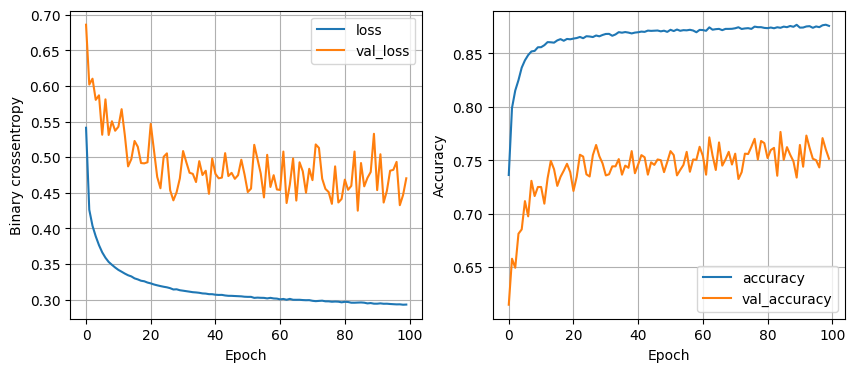

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8620 - loss: 0.3300
16 nodes, 0 dropout,0.001 lr, 128 batch
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6990 - loss: 0.6221 - val_accuracy: 0.5566 - val_loss: 0.7156
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7849 - loss: 0.4798 - val_accuracy: 0.6006 - val_loss: 0.6560
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8037 - loss: 0.4195 - val_accuracy: 0.6189 - val_loss: 0.6307
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8238 - loss: 0.3894 - val_accuracy: 0.6955 - val_loss: 0.5506
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8372 - loss: 0.3776 - val_accuracy: 0.7056 - val_loss: 0.5490
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8451 - loss: 0.3701 - val_accuracy: 0.6856 - val_loss: 0.5728
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8414 - loss: 0.3750 - val_accuracy: 0.6897 - val_loss: 0.5

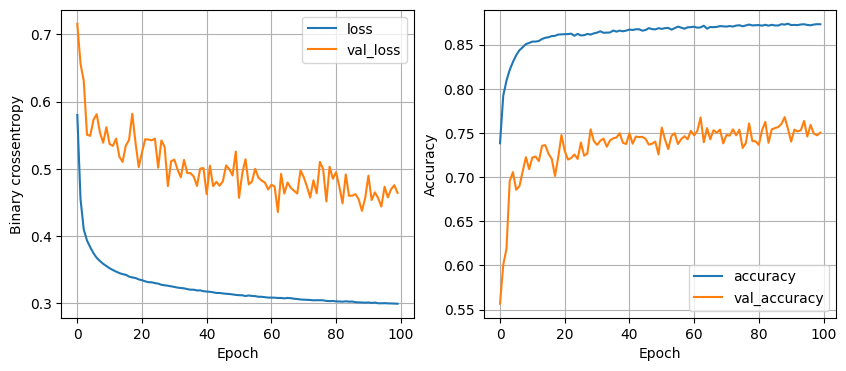

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8598 - loss: 0.3219
16 nodes, 0.2 dropout,0.1 lr, 32 batch
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7540 - loss: 0.5120 - val_accuracy: 0.4539 - val_loss: 0.6085
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7314 - loss: 0.5196 - val_accuracy: 0.8306 - val_loss: 0.6692
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7372 - loss: 0.5328 - val_accuracy: 0.7937 - val_loss: 0.5364
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7761 - loss: 0.5058 - val_accuracy: 0.7741 - val_loss: 0.6961
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7743 - loss: 0.5259 - val_accuracy: 0.8279 - val_loss: 0.6585
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7547 - loss: 0.5241 - val_accuracy: 0.8855 - val_loss: 0.7140
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7401 - loss: 0.5269 - val_accuracy: 0.8692 - 

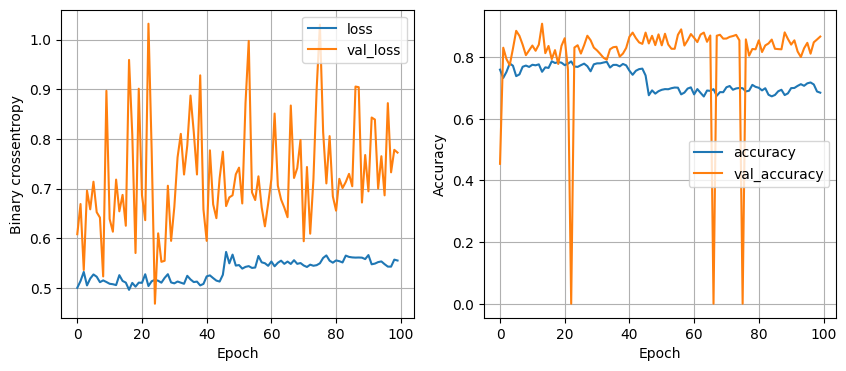

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7391 - loss: 0.5003
16 nodes, 0.2 dropout,0.1 lr, 64 batch
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7567 - loss: 0.5025 - val_accuracy: 0.4929 - val_loss: 0.6605
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8043 - loss: 0.4464 - val_accuracy: 0.6524 - val_loss: 0.5198
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8037 - loss: 0.4430 - val_accuracy: 0.6348 - val_loss: 0.6406
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8064 - loss: 0.4328 - val_accuracy: 0.5732 - val_loss: 0.5697
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8124 - loss: 0.4395 - val_accuracy: 0.5471 - val_loss: 0.6543
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8142 - loss: 0.4342 - val_accuracy: 0.6663 - val_loss: 0.6819
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8281 - loss: 0.4128 - val_accuracy: 0.7158 - 

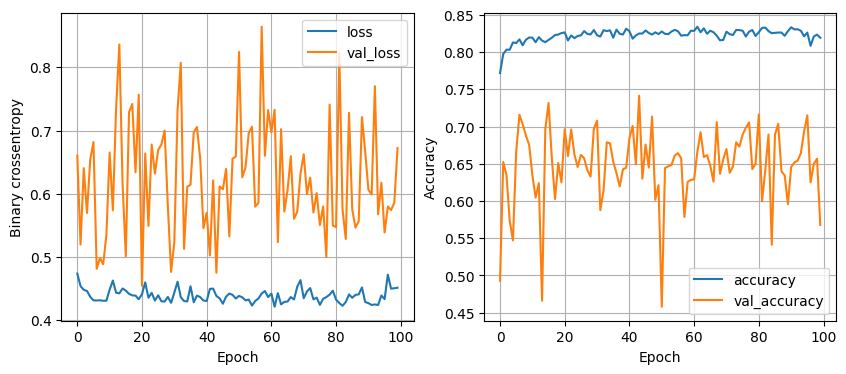

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8249 - loss: 0.4756
16 nodes, 0.2 dropout,0.1 lr, 128 batch
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7571 - loss: 0.5105 - val_accuracy: 0.7425 - val_loss: 0.3830
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8010 - loss: 0.4544 - val_accuracy: 0.5755 - val_loss: 0.6783
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8171 - loss: 0.4179 - val_accuracy: 0.7127 - val_loss: 0.4802
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8173 - loss: 0.4198 - val_accuracy: 0.5776 - val_loss: 0.6960
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8090 - loss: 0.4203 - val_accuracy: 0.5542 - val_loss: 0.6011
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8018 - loss: 0.4354 - val_accuracy: 0.4136 - val_loss: 0.8112
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8028 - loss: 0.4263 - val_accuracy: 0.6328 - val_loss: 0.4

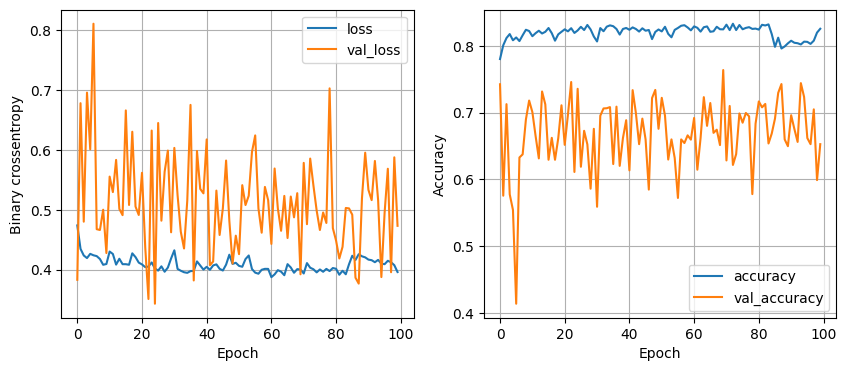

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8407 - loss: 0.3860
16 nodes, 0.2 dropout,0.005 lr, 32 batch
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7367 - loss: 0.5195 - val_accuracy: 0.6507 - val_loss: 0.6267
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8120 - loss: 0.4235 - val_accuracy: 0.7324 - val_loss: 0.5256
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8322 - loss: 0.3899 - val_accuracy: 0.6758 - val_loss: 0.6137
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8362 - loss: 0.3764 - val_accuracy: 0.6951 - val_loss: 0.6249
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8496 - loss: 0.3619 - val_accuracy: 0.7344 - val_loss: 0.5499
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8443 - loss: 0.3688 - val_accuracy: 0.7202 - val_loss: 0.5011
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8544 - loss: 0.3548 - val_accuracy: 0.7409 

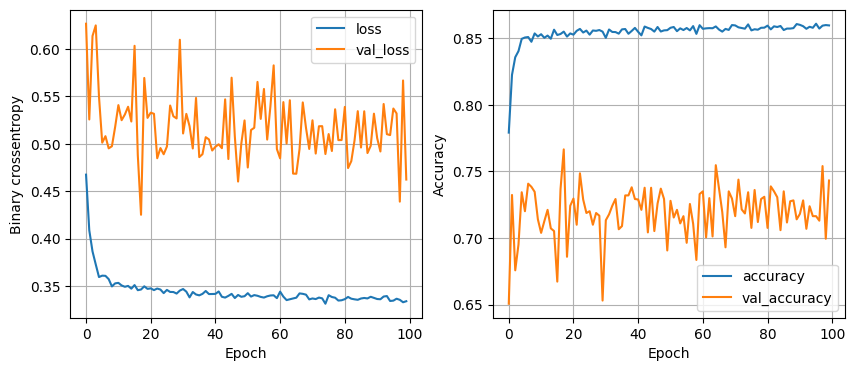

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8623 - loss: 0.3362
16 nodes, 0.2 dropout,0.005 lr, 64 batch
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7279 - loss: 0.5411 - val_accuracy: 0.6057 - val_loss: 0.6582
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8144 - loss: 0.4152 - val_accuracy: 0.7293 - val_loss: 0.5074
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8324 - loss: 0.3896 - val_accuracy: 0.7165 - val_loss: 0.5287
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8396 - loss: 0.3762 - val_accuracy: 0.7304 - val_loss: 0.5131
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8480 - loss: 0.3595 - val_accuracy: 0.7337 - val_loss: 0.5053
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8463 - loss: 0.3626 - val_accuracy: 0.7554 - val_loss: 0.4489
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8501 - loss: 0.3506 - val_accuracy: 0.7249 

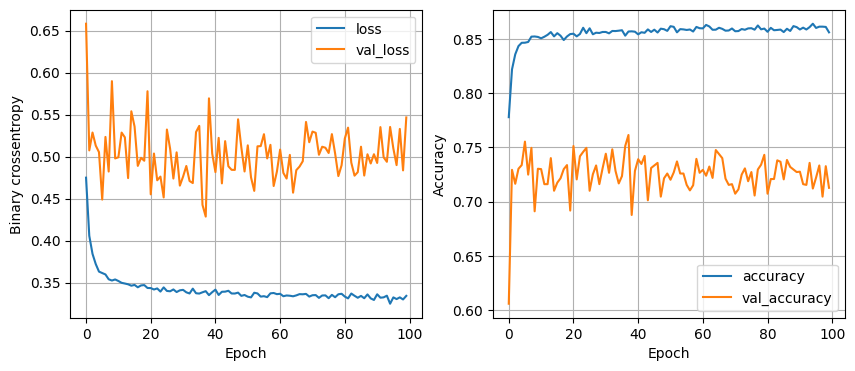

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8561 - loss: 0.3346
16 nodes, 0.2 dropout,0.005 lr, 128 batch
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7122 - loss: 0.5559 - val_accuracy: 0.6338 - val_loss: 0.6379
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8151 - loss: 0.4135 - val_accuracy: 0.6846 - val_loss: 0.5659
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8195 - loss: 0.4027 - val_accuracy: 0.7026 - val_loss: 0.5514
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8321 - loss: 0.3872 - val_accuracy: 0.7080 - val_loss: 0.5425
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8374 - loss: 0.3763 - val_accuracy: 0.7138 - val_loss: 0.5365
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8347 - loss: 0.3818 - val_accuracy: 0.7232 - val_loss: 0.5164
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8387 - loss: 0.3661 - val_accuracy: 0.7375 - val_loss: 0

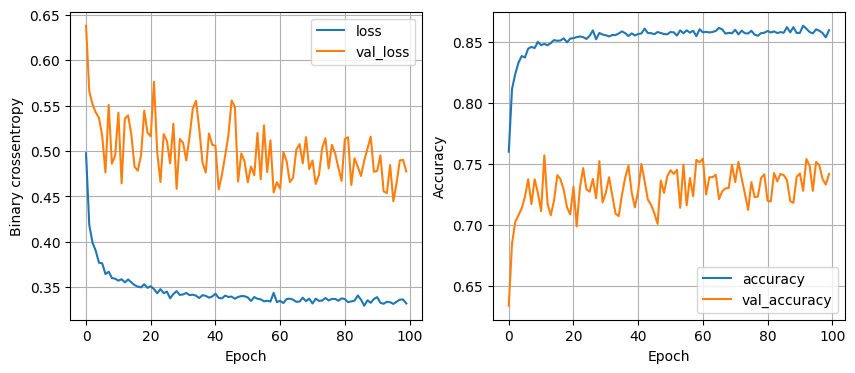

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8543 - loss: 0.3375
16 nodes, 0.2 dropout,0.001 lr, 32 batch
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5945 - loss: 0.6579 - val_accuracy: 0.5945 - val_loss: 0.6594
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7795 - loss: 0.4724 - val_accuracy: 0.6406 - val_loss: 0.6196
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7912 - loss: 0.4467 - val_accuracy: 0.6541 - val_loss: 0.6140
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8002 - loss: 0.4321 - val_accuracy: 0.6690 - val_loss: 0.6161
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8141 - loss: 0.4159 - val_accuracy: 0.6995 - val_loss: 0.5617
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8206 - loss: 0.4072 - val_accuracy: 0.7046 - val_loss: 0.5559
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8197 - loss: 0.3998 - val_accuracy: 0.7060 

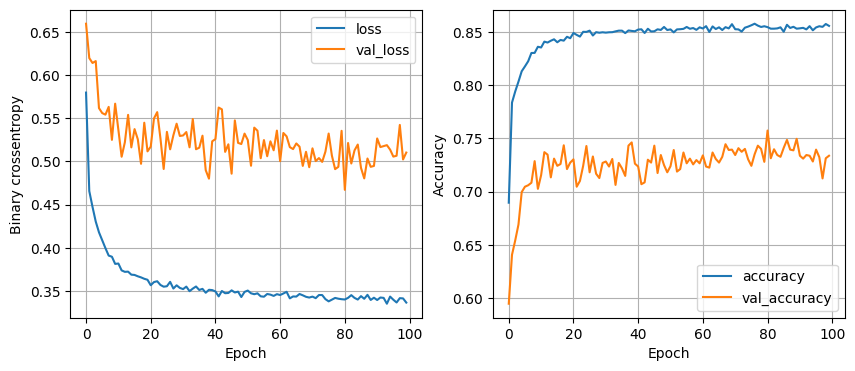

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8548 - loss: 0.3455
16 nodes, 0.2 dropout,0.001 lr, 64 batch
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6580 - loss: 0.6771 - val_accuracy: 0.5600 - val_loss: 0.6560
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7693 - loss: 0.4918 - val_accuracy: 0.6084 - val_loss: 0.6123
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7917 - loss: 0.4599 - val_accuracy: 0.6223 - val_loss: 0.6196
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8037 - loss: 0.4357 - val_accuracy: 0.6341 - val_loss: 0.6038
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8011 - loss: 0.4397 - val_accuracy: 0.6426 - val_loss: 0.6306
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8089 - loss: 0.4276 - val_accuracy: 0.6535 - val_loss: 0.6132
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8191 - loss: 0.4163 - val_accuracy: 0.6748 

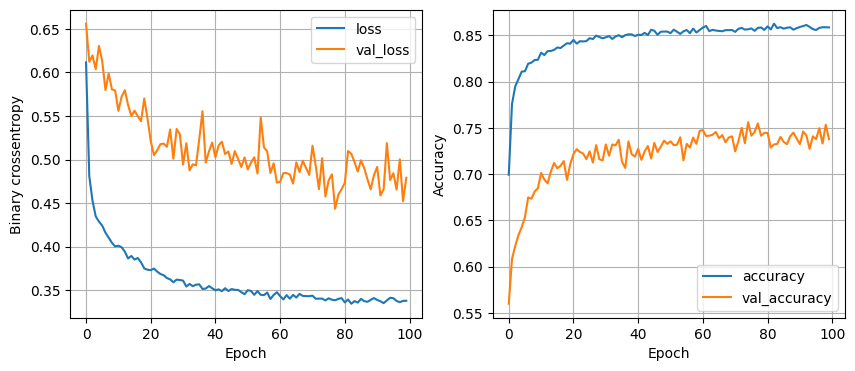

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8618 - loss: 0.3344
16 nodes, 0.2 dropout,0.001 lr, 128 batch
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6050 - loss: 0.6675 - val_accuracy: 0.5176 - val_loss: 0.6932
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7624 - loss: 0.5399 - val_accuracy: 0.6169 - val_loss: 0.6283
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7871 - loss: 0.4740 - val_accuracy: 0.6335 - val_loss: 0.6232
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7957 - loss: 0.4463 - val_accuracy: 0.6423 - val_loss: 0.6155
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8109 - loss: 0.4293 - val_accuracy: 0.6507 - val_loss: 0.6141
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8159 - loss: 0.4232 - val_accuracy: 0.6592 - val_loss: 0.6189
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8223 - loss: 0.4055 - val_accuracy: 0.6721 - val_loss: 0

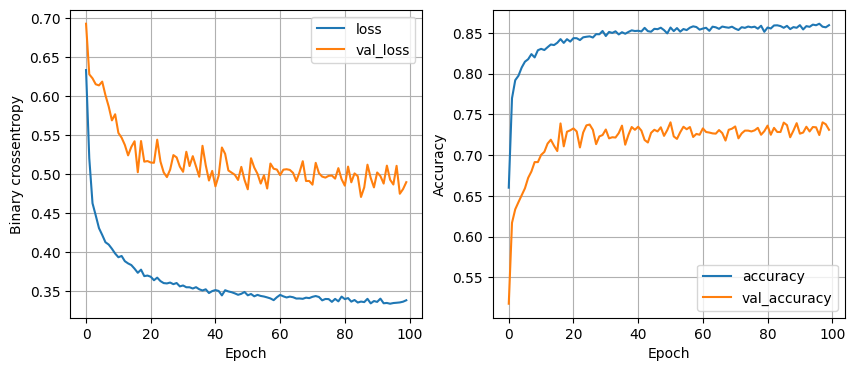

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8634 - loss: 0.3349
32 nodes, 0 dropout,0.1 lr, 32 batch
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7784 - loss: 0.4777 - val_accuracy: 0.8279 - val_loss: 0.5644
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8325 - loss: 0.4050 - val_accuracy: 0.6870 - val_loss: 0.8320
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8358 - loss: 0.3987 - val_accuracy: 0.6524 - val_loss: 0.9762
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8448 - loss: 0.3809 - val_accuracy: 0.6646 - val_loss: 0.9561
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8410 - loss: 0.3788 - val_accuracy: 0.7517 - val_loss: 0.4778
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8471 - loss: 0.3757 - val_accuracy: 0.7320 - val_loss: 0.5636
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8457 - loss: 0.3832 - val_accuracy: 0.7364 - va

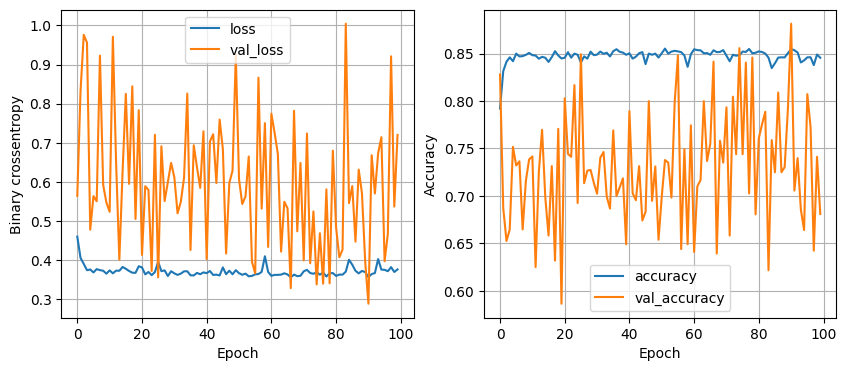

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8429 - loss: 0.3869
32 nodes, 0 dropout,0.1 lr, 64 batch
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7796 - loss: 0.4750 - val_accuracy: 0.7246 - val_loss: 0.4929
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8443 - loss: 0.3780 - val_accuracy: 0.5366 - val_loss: 0.8513
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8519 - loss: 0.3598 - val_accuracy: 0.5820 - val_loss: 0.7232
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8372 - loss: 0.3723 - val_accuracy: 0.5644 - val_loss: 0.7474
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8525 - loss: 0.3511 - val_accuracy: 0.7077 - val_loss: 0.5462
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8562 - loss: 0.3437 - val_accuracy: 0.7995 - val_loss: 0.4568
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8458 - loss: 0.3650 - val_accuracy: 0.6379 - va

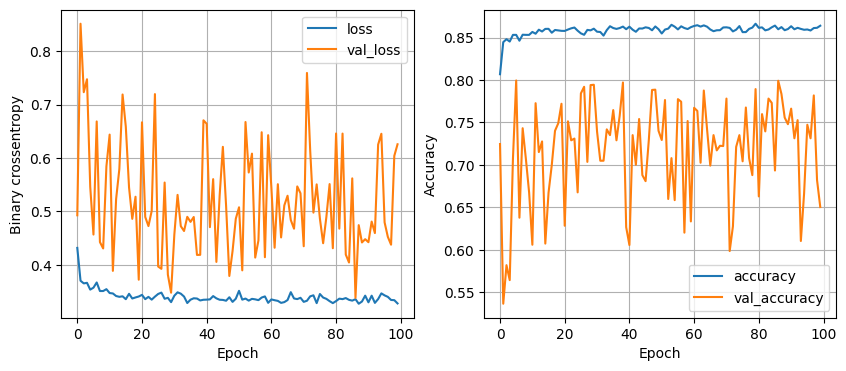

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8471 - loss: 0.3563
32 nodes, 0 dropout,0.1 lr, 128 batch
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7666 - loss: 0.4859 - val_accuracy: 0.5810 - val_loss: 0.6765
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8378 - loss: 0.3743 - val_accuracy: 0.6711 - val_loss: 0.5345
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8573 - loss: 0.3521 - val_accuracy: 0.7575 - val_loss: 0.4400
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8611 - loss: 0.3366 - val_accuracy: 0.7483 - val_loss: 0.4112
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8493 - loss: 0.3540 - val_accuracy: 0.7354 - val_loss: 0.5242
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8499 - loss: 0.3514 - val_accuracy: 0.7324 - val_loss: 0.5744
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8545 - loss: 0.3373 - val_accuracy: 0.7656 - val_loss: 0.459

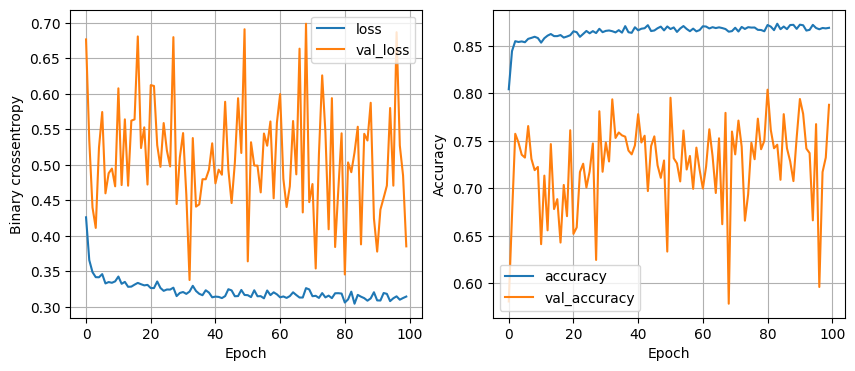

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8645 - loss: 0.3597
32 nodes, 0 dropout,0.005 lr, 32 batch
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8047 - loss: 0.4238 - val_accuracy: 0.7686 - val_loss: 0.4387
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8521 - loss: 0.3523 - val_accuracy: 0.6362 - val_loss: 0.7408
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8640 - loss: 0.3249 - val_accuracy: 0.7351 - val_loss: 0.5066
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8648 - loss: 0.3259 - val_accuracy: 0.7249 - val_loss: 0.5236
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8623 - loss: 0.3246 - val_accuracy: 0.7263 - val_loss: 0.5273
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8643 - loss: 0.3208 - val_accuracy: 0.7568 - val_loss: 0.4341
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8696 - loss: 0.3047 - val_accuracy: 0.7351 - 

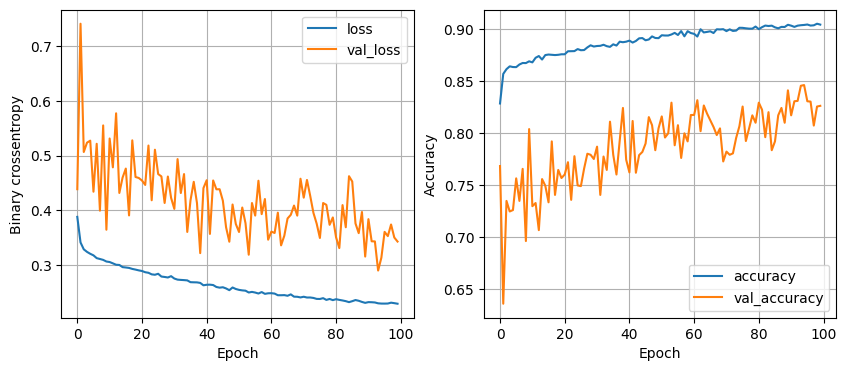

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8605 - loss: 0.3586
32 nodes, 0 dropout,0.005 lr, 64 batch
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7740 - loss: 0.4749 - val_accuracy: 0.7273 - val_loss: 0.5130
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8469 - loss: 0.3571 - val_accuracy: 0.7121 - val_loss: 0.5754
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8548 - loss: 0.3417 - val_accuracy: 0.7500 - val_loss: 0.4963
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8597 - loss: 0.3320 - val_accuracy: 0.7527 - val_loss: 0.4815
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8611 - loss: 0.3308 - val_accuracy: 0.7602 - val_loss: 0.4824
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8721 - loss: 0.3086 - val_accuracy: 0.7608 - val_loss: 0.4460
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8668 - loss: 0.3149 - val_accuracy: 0.7768 - 

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8487 - loss: 0.3757
32 nodes, 0 dropout,0.005 lr, 128 batch
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7600 - loss: 0.5246 - val_accuracy: 0.7510 - val_loss: 0.4760
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8487 - loss: 0.3665 - val_accuracy: 0.8076 - val_loss: 0.3949
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8584 - loss: 0.3461 - val_accuracy: 0.7283 - val_loss: 0.5544
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8635 - loss: 0.3332 - val_accuracy: 0.7402 - val_loss: 0.4909
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8646 - loss: 0.3263 - val_accuracy: 0.7470 - val_loss: 0.4769
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8595 - loss: 0.3283 - val_accuracy: 0.7920 - val_loss: 0.3975
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8651 - loss: 0.3218 - val_accuracy: 0.7649 - val_loss: 0.4

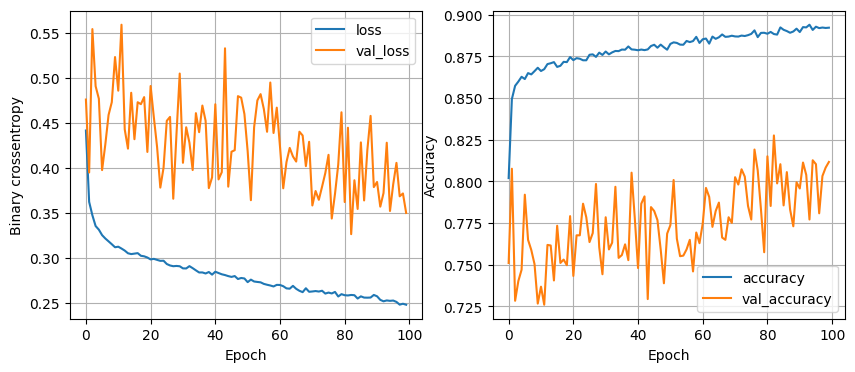

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8650 - loss: 0.3417
32 nodes, 0 dropout,0.001 lr, 32 batch
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7615 - loss: 0.5127 - val_accuracy: 0.6853 - val_loss: 0.5677
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8305 - loss: 0.3744 - val_accuracy: 0.7029 - val_loss: 0.5416
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8484 - loss: 0.3586 - val_accuracy: 0.7093 - val_loss: 0.5566
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8528 - loss: 0.3500 - val_accuracy: 0.7608 - val_loss: 0.4702
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8592 - loss: 0.3339 - val_accuracy: 0.7673 - val_loss: 0.4559
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8617 - loss: 0.3324 - val_accuracy: 0.7256 - val_loss: 0.5385
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8705 - loss: 0.3182 - val_accuracy: 0.7493 - 

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8667 - loss: 0.3371
32 nodes, 0 dropout,0.001 lr, 64 batch
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7438 - loss: 0.5412 - val_accuracy: 0.6409 - val_loss: 0.6088
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8309 - loss: 0.3873 - val_accuracy: 0.7039 - val_loss: 0.5393
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8499 - loss: 0.3645 - val_accuracy: 0.7229 - val_loss: 0.5281
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8561 - loss: 0.3527 - val_accuracy: 0.7436 - val_loss: 0.5086
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8513 - loss: 0.3536 - val_accuracy: 0.7541 - val_loss: 0.4847
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8554 - loss: 0.3412 - val_accuracy: 0.7290 - val_loss: 0.5191
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8615 - loss: 0.3361 - val_accuracy: 0.7490 - 

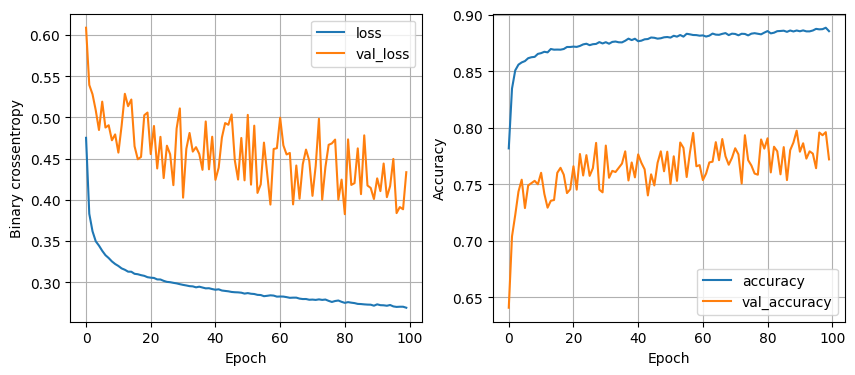

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8679 - loss: 0.3249
32 nodes, 0 dropout,0.001 lr, 128 batch
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6904 - loss: 0.5969 - val_accuracy: 0.6043 - val_loss: 0.6214
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8040 - loss: 0.4224 - val_accuracy: 0.6297 - val_loss: 0.6072
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8199 - loss: 0.3950 - val_accuracy: 0.6690 - val_loss: 0.5746
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8386 - loss: 0.3703 - val_accuracy: 0.6965 - val_loss: 0.5355
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8496 - loss: 0.3631 - val_accuracy: 0.7185 - val_loss: 0.5224
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8484 - loss: 0.3575 - val_accuracy: 0.7161 - val_loss: 0.5318
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8548 - loss: 0.3486 - val_accuracy: 0.7456 - val_loss: 0.4

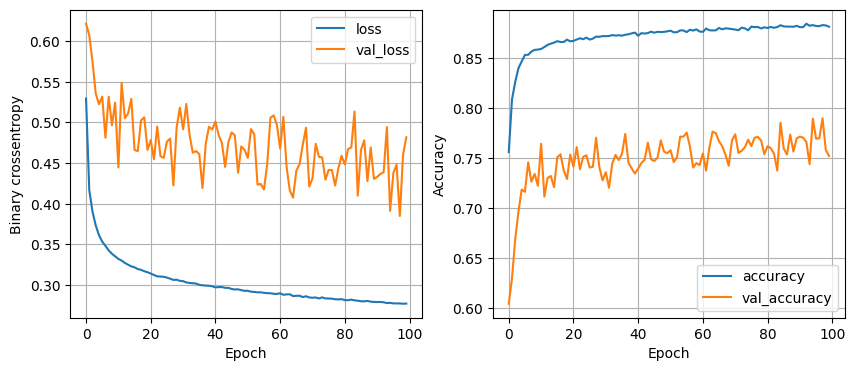

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8652 - loss: 0.3229
32 nodes, 0.2 dropout,0.1 lr, 32 batch
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7284 - loss: 0.5806 - val_accuracy: 0.3933 - val_loss: 0.6245
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7451 - loss: 0.5123 - val_accuracy: 0.2154 - val_loss: 0.7507
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6678 - loss: 0.5977 - val_accuracy: 0.0925 - val_loss: 0.8161
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7080 - loss: 0.5669 - val_accuracy: 0.1870 - val_loss: 0.8115
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6816 - loss: 0.6481 - val_accuracy: 0.1704 - val_loss: 0.9833
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6820 - loss: 0.6587 - val_accuracy: 0.0142 - val_loss: 1.0492
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6391 - loss: 0.6645 - val_accuracy: 0.0041 - 

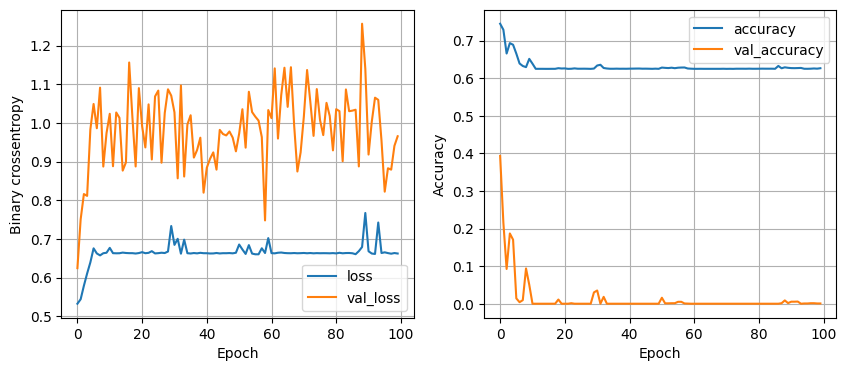

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6603 - loss: 0.6444
32 nodes, 0.2 dropout,0.1 lr, 64 batch
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7579 - loss: 0.5088 - val_accuracy: 0.5813 - val_loss: 0.4438
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7553 - loss: 0.4810 - val_accuracy: 0.5400 - val_loss: 0.6628
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7640 - loss: 0.5050 - val_accuracy: 0.3669 - val_loss: 0.7921
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7671 - loss: 0.4925 - val_accuracy: 0.3550 - val_loss: 0.7632
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7447 - loss: 0.5186 - val_accuracy: 0.3042 - val_loss: 0.7481
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7184 - loss: 0.5398 - val_accuracy: 0.3516 - val_loss: 0.7334
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7283 - loss: 0.5229 - val_accuracy: 0.2934 - 

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7967 - loss: 0.5763
32 nodes, 0.2 dropout,0.1 lr, 128 batch
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7585 - loss: 0.5037 - val_accuracy: 0.5688 - val_loss: 0.5999
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8001 - loss: 0.4370 - val_accuracy: 0.5034 - val_loss: 0.7714
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8139 - loss: 0.4183 - val_accuracy: 0.6467 - val_loss: 0.5858
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8167 - loss: 0.4137 - val_accuracy: 0.6789 - val_loss: 0.3963
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8290 - loss: 0.4032 - val_accuracy: 0.6900 - val_loss: 0.4567
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8282 - loss: 0.4051 - val_accuracy: 0.7249 - val_loss: 0.4546
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8178 - loss: 0.4004 - val_accuracy: 0.6369 - val_loss: 0.

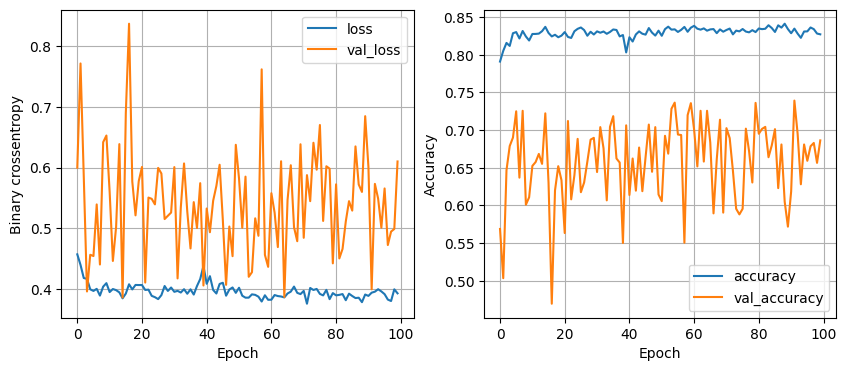

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8530 - loss: 0.3925
32 nodes, 0.2 dropout,0.005 lr, 32 batch
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7780 - loss: 0.4705 - val_accuracy: 0.6545 - val_loss: 0.6314
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8394 - loss: 0.3779 - val_accuracy: 0.6951 - val_loss: 0.5007
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8486 - loss: 0.3643 - val_accuracy: 0.7053 - val_loss: 0.5089
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8537 - loss: 0.3453 - val_accuracy: 0.7405 - val_loss: 0.4519
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8525 - loss: 0.3473 - val_accuracy: 0.7202 - val_loss: 0.4864
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8597 - loss: 0.3409 - val_accuracy: 0.7141 - val_loss: 0.5446
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8570 - loss: 0.3295 - val_accuracy: 0.6961 

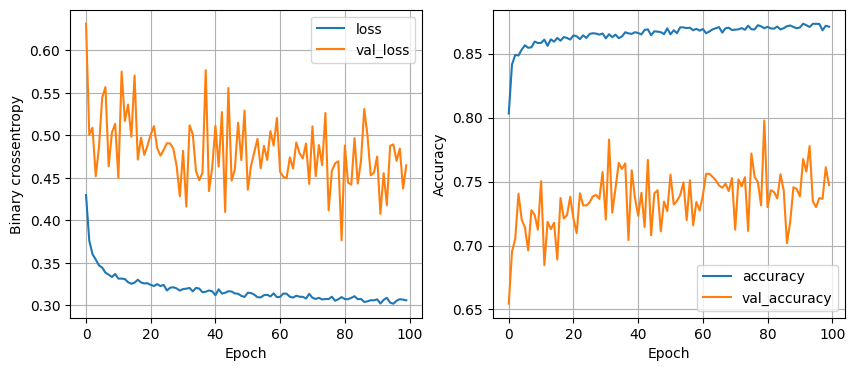

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8670 - loss: 0.3201
32 nodes, 0.2 dropout,0.005 lr, 64 batch
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7588 - loss: 0.4942 - val_accuracy: 0.6673 - val_loss: 0.5800
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8302 - loss: 0.3898 - val_accuracy: 0.7266 - val_loss: 0.5224
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8422 - loss: 0.3739 - val_accuracy: 0.7110 - val_loss: 0.5718
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8505 - loss: 0.3622 - val_accuracy: 0.7182 - val_loss: 0.5268
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8563 - loss: 0.3480 - val_accuracy: 0.7354 - val_loss: 0.4984
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8629 - loss: 0.3301 - val_accuracy: 0.7381 - val_loss: 0.4591
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8593 - loss: 0.3332 - val_accuracy: 0.7568 

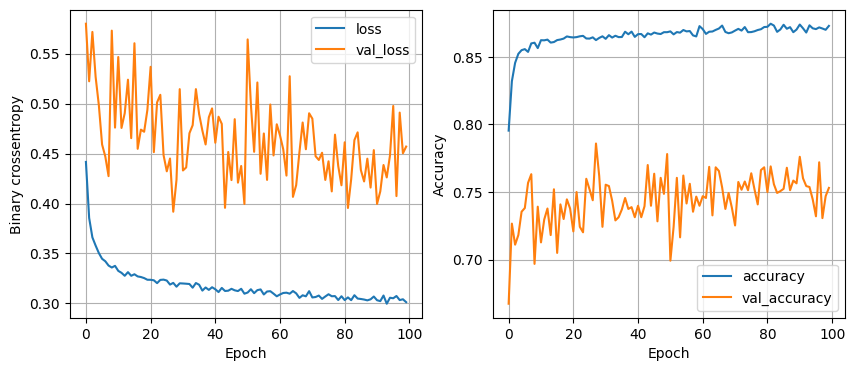

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8684 - loss: 0.3261
32 nodes, 0.2 dropout,0.005 lr, 128 batch
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7129 - loss: 0.5514 - val_accuracy: 0.6633 - val_loss: 0.6179
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8219 - loss: 0.4074 - val_accuracy: 0.6657 - val_loss: 0.6207
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8383 - loss: 0.3738 - val_accuracy: 0.7375 - val_loss: 0.5093
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8406 - loss: 0.3687 - val_accuracy: 0.7293 - val_loss: 0.5184
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8493 - loss: 0.3541 - val_accuracy: 0.7334 - val_loss: 0.5072
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8525 - loss: 0.3448 - val_accuracy: 0.7663 - val_loss: 0.4498
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8532 - loss: 0.3455 - val_accuracy: 0.6921 - val_loss: 0

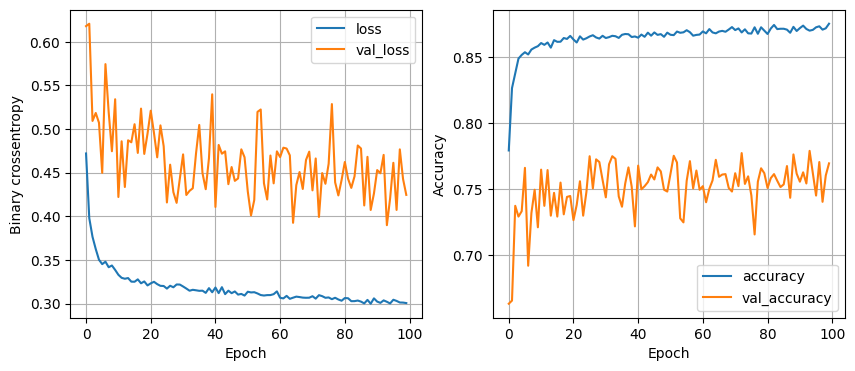

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8705 - loss: 0.3107
32 nodes, 0.2 dropout,0.001 lr, 32 batch
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7086 - loss: 0.5632 - val_accuracy: 0.6308 - val_loss: 0.6358
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8052 - loss: 0.4214 - val_accuracy: 0.6582 - val_loss: 0.6208
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8241 - loss: 0.3958 - val_accuracy: 0.6734 - val_loss: 0.5739
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8275 - loss: 0.3953 - val_accuracy: 0.6809 - val_loss: 0.5794
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8351 - loss: 0.3884 - val_accuracy: 0.6890 - val_loss: 0.5895
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8393 - loss: 0.3718 - val_accuracy: 0.7114 - val_loss: 0.5482
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8506 - loss: 0.3593 - val_accuracy: 0.7253 

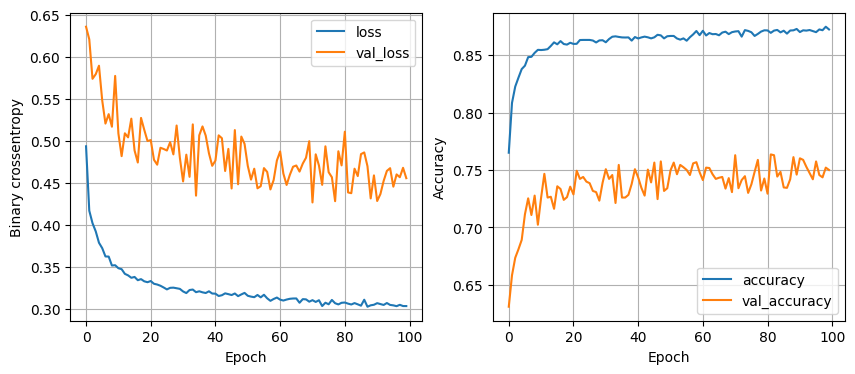

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8669 - loss: 0.3170
32 nodes, 0.2 dropout,0.001 lr, 64 batch
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6844 - loss: 0.5930 - val_accuracy: 0.6081 - val_loss: 0.6366
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7935 - loss: 0.4441 - val_accuracy: 0.6341 - val_loss: 0.6084
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8103 - loss: 0.4166 - val_accuracy: 0.6467 - val_loss: 0.6192
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8212 - loss: 0.4121 - val_accuracy: 0.6816 - val_loss: 0.5763
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8293 - loss: 0.4056 - val_accuracy: 0.7199 - val_loss: 0.5381
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8351 - loss: 0.3850 - val_accuracy: 0.7253 - val_loss: 0.5293
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8372 - loss: 0.3770 - val_accuracy: 0.7016 

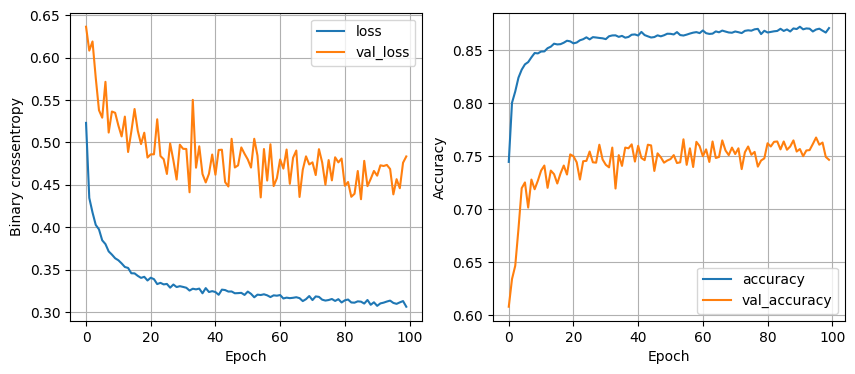

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8672 - loss: 0.3191
32 nodes, 0.2 dropout,0.001 lr, 128 batch
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6690 - loss: 0.6204 - val_accuracy: 0.5539 - val_loss: 0.6736
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7864 - loss: 0.4616 - val_accuracy: 0.6196 - val_loss: 0.6363
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7999 - loss: 0.4302 - val_accuracy: 0.6321 - val_loss: 0.6185
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8099 - loss: 0.4143 - val_accuracy: 0.6690 - val_loss: 0.5860
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8295 - loss: 0.4017 - val_accuracy: 0.6900 - val_loss: 0.5784
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8189 - loss: 0.4088 - val_accuracy: 0.6938 - val_loss: 0.5871
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8315 - loss: 0.3928 - val_accuracy: 0.7104 - val_loss: 0

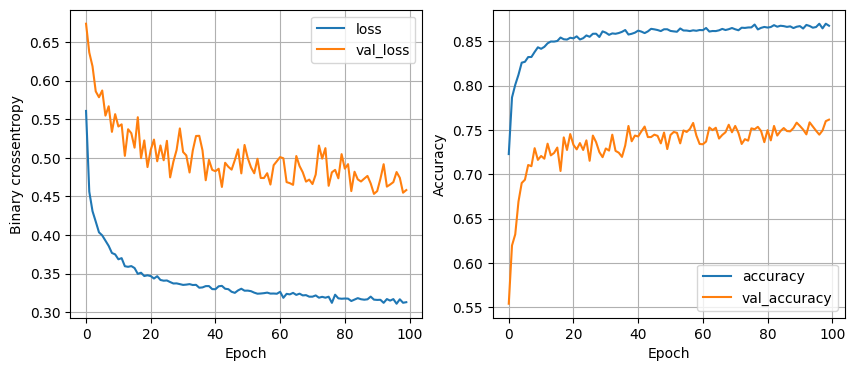

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8675 - loss: 0.3221
63 nodes, 0 dropout,0.1 lr, 32 batch
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7745 - loss: 0.5051 - val_accuracy: 0.6484 - val_loss: 1.1629
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8026 - loss: 0.4605 - val_accuracy: 0.8896 - val_loss: 0.6159
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8082 - loss: 0.4500 - val_accuracy: 0.7856 - val_loss: 0.4236
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8343 - loss: 0.4002 - val_accuracy: 0.8347 - val_loss: 0.3808
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8389 - loss: 0.3932 - val_accuracy: 0.6870 - val_loss: 0.8448
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8445 - loss: 0.4263 - val_accuracy: 0.7138 - val_loss: 0.7424
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8344 - loss: 0.4058 - val_accuracy: 0.7419 - va

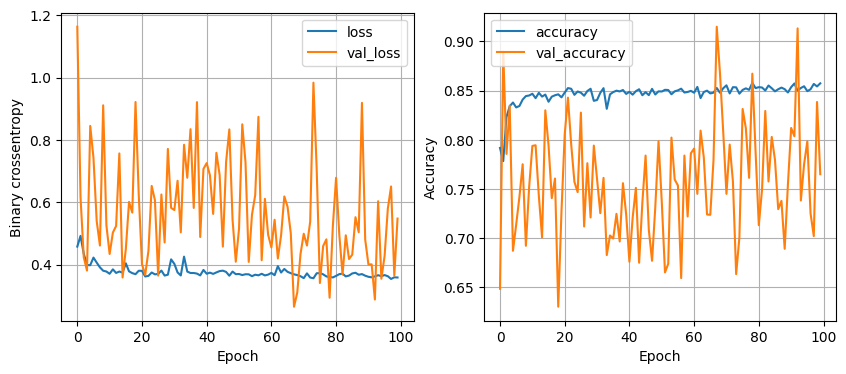

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8570 - loss: 0.3659
63 nodes, 0 dropout,0.1 lr, 64 batch
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7587 - loss: 0.5986 - val_accuracy: 0.6633 - val_loss: 0.7535
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8387 - loss: 0.3902 - val_accuracy: 0.5633 - val_loss: 0.6997
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8370 - loss: 0.4046 - val_accuracy: 0.6419 - val_loss: 0.5606
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8429 - loss: 0.3718 - val_accuracy: 0.6545 - val_loss: 0.6559
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8381 - loss: 0.3735 - val_accuracy: 0.5518 - val_loss: 0.6392
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8444 - loss: 0.3733 - val_accuracy: 0.7144 - val_loss: 0.5783
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8502 - loss: 0.3564 - val_accuracy: 0.7253 - va

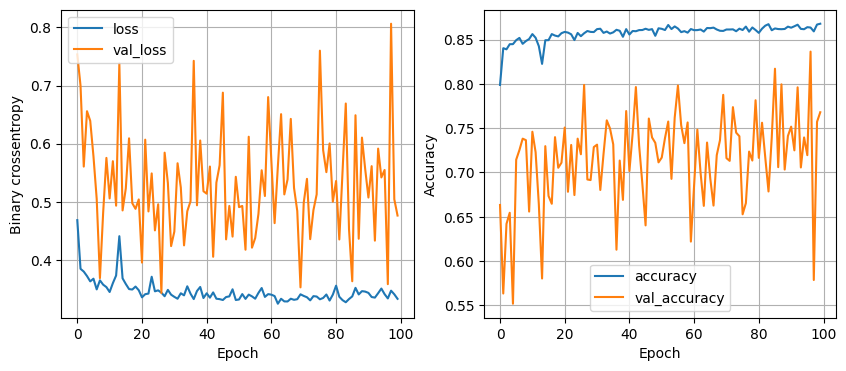

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8551 - loss: 0.3575
63 nodes, 0 dropout,0.1 lr, 128 batch
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7646 - loss: 0.5008 - val_accuracy: 0.6724 - val_loss: 0.5852
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8409 - loss: 0.3673 - val_accuracy: 0.7344 - val_loss: 0.4767
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8468 - loss: 0.3600 - val_accuracy: 0.6419 - val_loss: 0.7813
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8447 - loss: 0.3609 - val_accuracy: 0.6196 - val_loss: 0.6721
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8461 - loss: 0.3562 - val_accuracy: 0.6836 - val_loss: 0.5467
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8533 - loss: 0.3418 - val_accuracy: 0.6467 - val_loss: 0.5717
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8497 - loss: 0.3426 - val_accuracy: 0.7182 - val_loss: 0.359

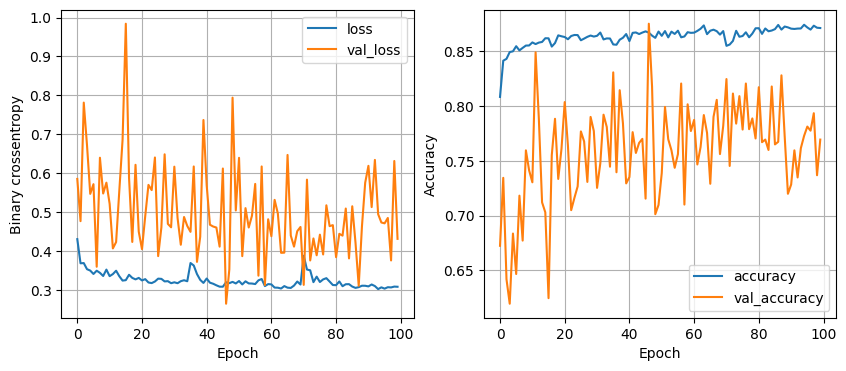

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8613 - loss: 0.3413
63 nodes, 0 dropout,0.005 lr, 32 batch
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8080 - loss: 0.4336 - val_accuracy: 0.7304 - val_loss: 0.4998
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8518 - loss: 0.3423 - val_accuracy: 0.7503 - val_loss: 0.4228
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8652 - loss: 0.3280 - val_accuracy: 0.7608 - val_loss: 0.4452
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8629 - loss: 0.3201 - val_accuracy: 0.7873 - val_loss: 0.4012
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8671 - loss: 0.3137 - val_accuracy: 0.7171 - val_loss: 0.5410
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8700 - loss: 0.3012 - val_accuracy: 0.7253 - val_loss: 0.5344
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8731 - loss: 0.3029 - val_accuracy: 0.7700 - 

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8337 - loss: 0.6327
63 nodes, 0 dropout,0.005 lr, 64 batch
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7984 - loss: 0.4404 - val_accuracy: 0.6928 - val_loss: 0.5896
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8570 - loss: 0.3488 - val_accuracy: 0.7436 - val_loss: 0.4879
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8730 - loss: 0.3112 - val_accuracy: 0.7246 - val_loss: 0.5096
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8675 - loss: 0.3210 - val_accuracy: 0.7361 - val_loss: 0.4901
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8638 - loss: 0.3232 - val_accuracy: 0.7744 - val_loss: 0.4361
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8706 - loss: 0.3084 - val_accuracy: 0.7432 - val_loss: 0.4579
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8776 - loss: 0.2999 - val_accuracy: 0.7249 - 

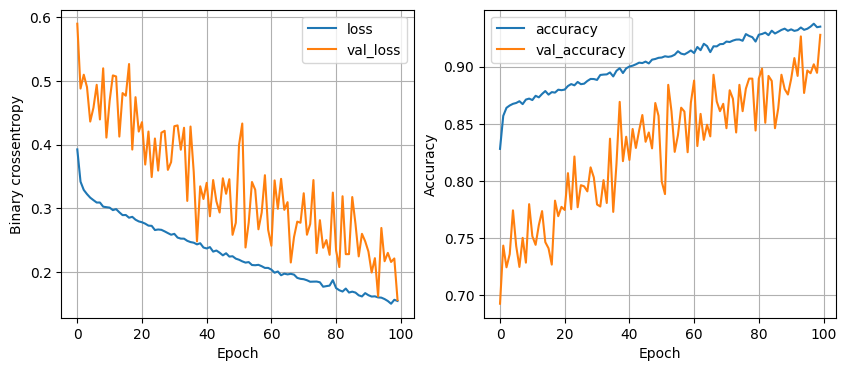

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8441 - loss: 0.5126
63 nodes, 0 dropout,0.005 lr, 128 batch
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7811 - loss: 0.4619 - val_accuracy: 0.7547 - val_loss: 0.4881
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8555 - loss: 0.3445 - val_accuracy: 0.7453 - val_loss: 0.4705
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8613 - loss: 0.3294 - val_accuracy: 0.7270 - val_loss: 0.5116
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8630 - loss: 0.3320 - val_accuracy: 0.7320 - val_loss: 0.5353
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8658 - loss: 0.3208 - val_accuracy: 0.7425 - val_loss: 0.4719
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8667 - loss: 0.3067 - val_accuracy: 0.7199 - val_loss: 0.5316
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8659 - loss: 0.3146 - val_accuracy: 0.7358 - val_loss: 0.5

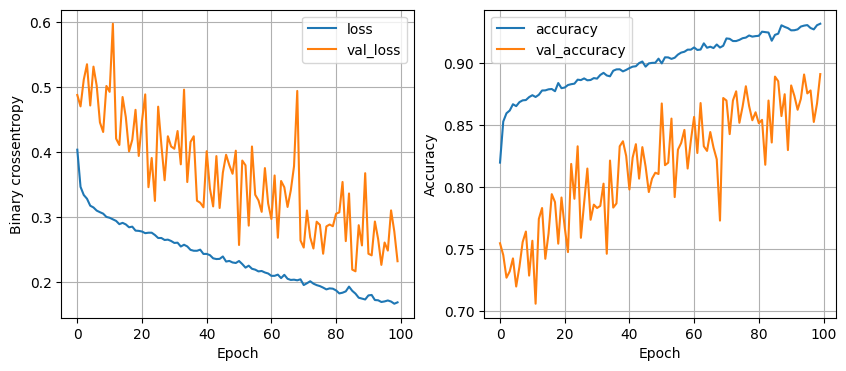

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8414 - loss: 0.4707
63 nodes, 0 dropout,0.001 lr, 32 batch
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7643 - loss: 0.4963 - val_accuracy: 0.7073 - val_loss: 0.5184
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8422 - loss: 0.3696 - val_accuracy: 0.7636 - val_loss: 0.4842
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8579 - loss: 0.3456 - val_accuracy: 0.7256 - val_loss: 0.5080
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8601 - loss: 0.3264 - val_accuracy: 0.6992 - val_loss: 0.5910
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8620 - loss: 0.3261 - val_accuracy: 0.7317 - val_loss: 0.5350
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8714 - loss: 0.3138 - val_accuracy: 0.7151 - val_loss: 0.5448
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8701 - loss: 0.3169 - val_accuracy: 0.7622 - 

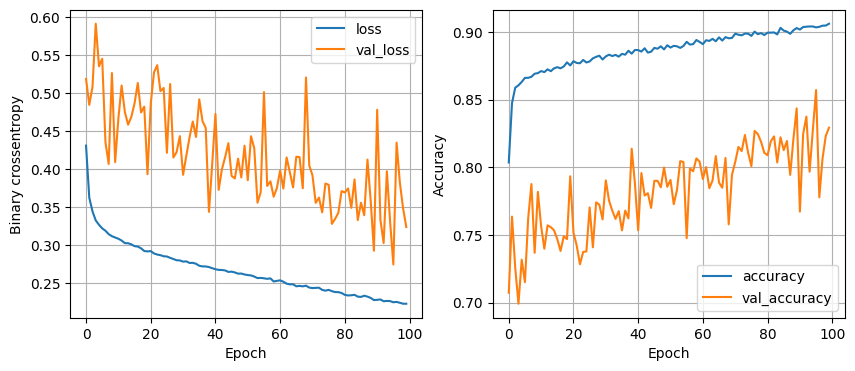

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8676 - loss: 0.3431
63 nodes, 0 dropout,0.001 lr, 64 batch
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7555 - loss: 0.5259 - val_accuracy: 0.6040 - val_loss: 0.6700
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8382 - loss: 0.3729 - val_accuracy: 0.7009 - val_loss: 0.5491
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8554 - loss: 0.3448 - val_accuracy: 0.7219 - val_loss: 0.5387
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8524 - loss: 0.3425 - val_accuracy: 0.7680 - val_loss: 0.4390
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8647 - loss: 0.3261 - val_accuracy: 0.7361 - val_loss: 0.5049
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8651 - loss: 0.3257 - val_accuracy: 0.7551 - val_loss: 0.4512
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8640 - loss: 0.3234 - val_accuracy: 0.7480 - 

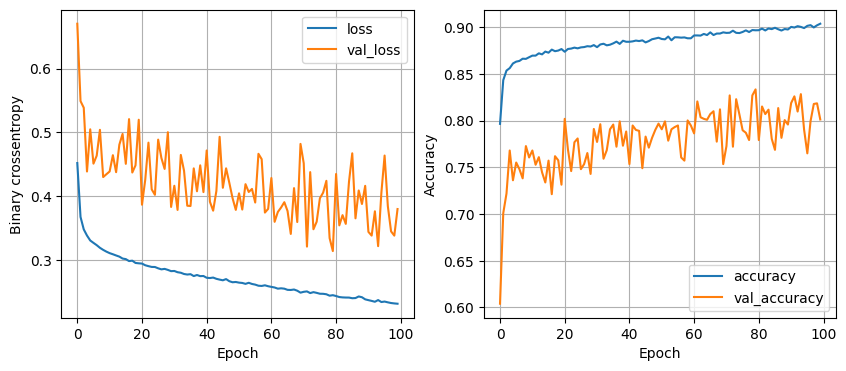

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8605 - loss: 0.3358
63 nodes, 0 dropout,0.001 lr, 128 batch
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7430 - loss: 0.5491 - val_accuracy: 0.6402 - val_loss: 0.6276
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8214 - loss: 0.3934 - val_accuracy: 0.7100 - val_loss: 0.5211
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8497 - loss: 0.3571 - val_accuracy: 0.7490 - val_loss: 0.4736
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8571 - loss: 0.3509 - val_accuracy: 0.7019 - val_loss: 0.5692
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8572 - loss: 0.3448 - val_accuracy: 0.6948 - val_loss: 0.5735
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8574 - loss: 0.3414 - val_accuracy: 0.7077 - val_loss: 0.5524
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8624 - loss: 0.3326 - val_accuracy: 0.7192 - val_loss: 0.5

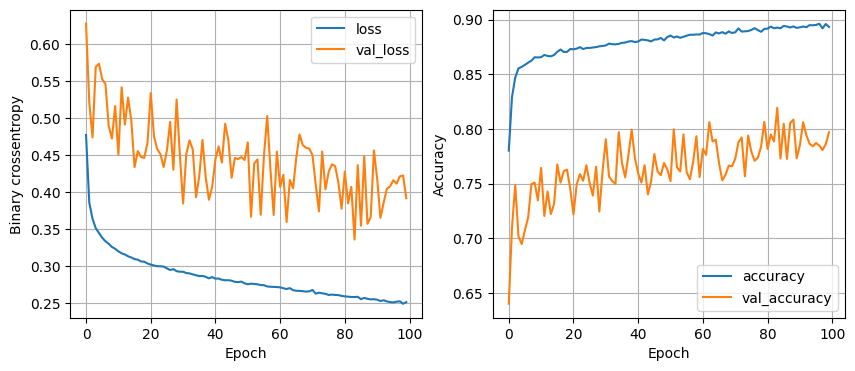

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8644 - loss: 0.3285
63 nodes, 0.2 dropout,0.1 lr, 32 batch
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7392 - loss: 0.5941 - val_accuracy: 0.2818 - val_loss: 0.8738
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6487 - loss: 0.6546 - val_accuracy: 0.0000e+00 - val_loss: 1.0300
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6290 - loss: 0.6612 - val_accuracy: 0.0000e+00 - val_loss: 1.0701
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6243 - loss: 0.6783 - val_accuracy: 0.0000e+00 - val_loss: 1.0037
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6215 - loss: 0.6651 - val_accuracy: 0.0000e+00 - val_loss: 0.9439
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6268 - loss: 0.6617 - val_accuracy: 0.0000e+00 - val_loss: 1.1576
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6264 - loss: 0.6670 - val

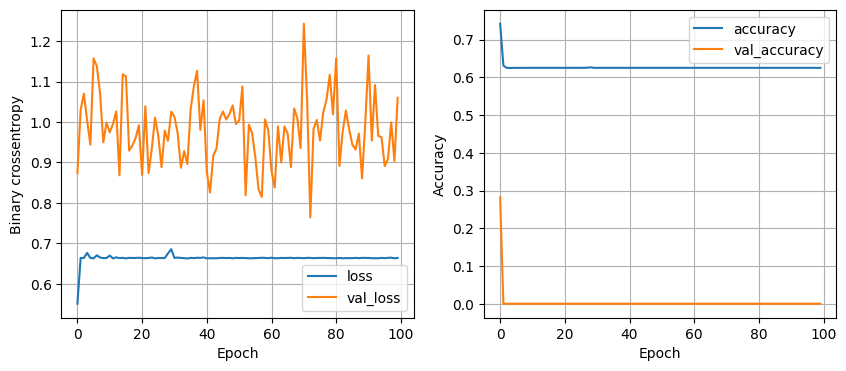

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6603 - loss: 0.6409
63 nodes, 0.2 dropout,0.1 lr, 64 batch
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7646 - loss: 0.5431 - val_accuracy: 0.5014 - val_loss: 0.5326
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7586 - loss: 0.4991 - val_accuracy: 0.4038 - val_loss: 0.6444
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7501 - loss: 0.5173 - val_accuracy: 0.4688 - val_loss: 0.6738
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7458 - loss: 0.4963 - val_accuracy: 0.5075 - val_loss: 0.4952
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7609 - loss: 0.5170 - val_accuracy: 0.0759 - val_loss: 1.0941
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6639 - loss: 0.6000 - val_accuracy: 0.8476 - val_loss: 0.6046
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6956 - loss: 0.5546 - val_accuracy: 0.0163 - 

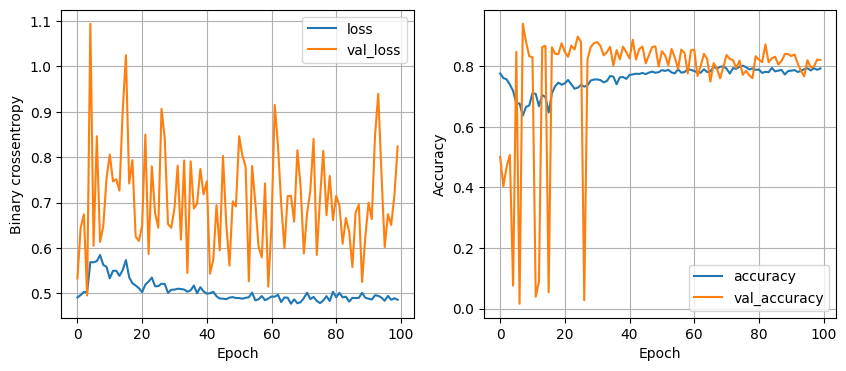

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7980 - loss: 0.4809
63 nodes, 0.2 dropout,0.1 lr, 128 batch
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7465 - loss: 0.6076 - val_accuracy: 0.6325 - val_loss: 0.5514
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8115 - loss: 0.4339 - val_accuracy: 0.6863 - val_loss: 0.6852
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8174 - loss: 0.4121 - val_accuracy: 0.6890 - val_loss: 0.4844
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8142 - loss: 0.4135 - val_accuracy: 0.6961 - val_loss: 0.4753
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8113 - loss: 0.4282 - val_accuracy: 0.5650 - val_loss: 0.6251
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8193 - loss: 0.4146 - val_accuracy: 0.5288 - val_loss: 0.6553
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7776 - loss: 0.4611 - val_accuracy: 0.4658 - val_loss: 0.6

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8294 - loss: 0.4461
63 nodes, 0.2 dropout,0.005 lr, 32 batch
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7888 - loss: 0.4500 - val_accuracy: 0.6548 - val_loss: 0.6371
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8439 - loss: 0.3624 - val_accuracy: 0.6999 - val_loss: 0.4761
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8494 - loss: 0.3540 - val_accuracy: 0.7412 - val_loss: 0.4758
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8546 - loss: 0.3466 - val_accuracy: 0.7744 - val_loss: 0.4097
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8537 - loss: 0.3404 - val_accuracy: 0.7202 - val_loss: 0.4965
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8484 - loss: 0.3515 - val_accuracy: 0.7117 - val_loss: 0.5413
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8564 - loss: 0.3323 - val_accuracy: 0.7520 

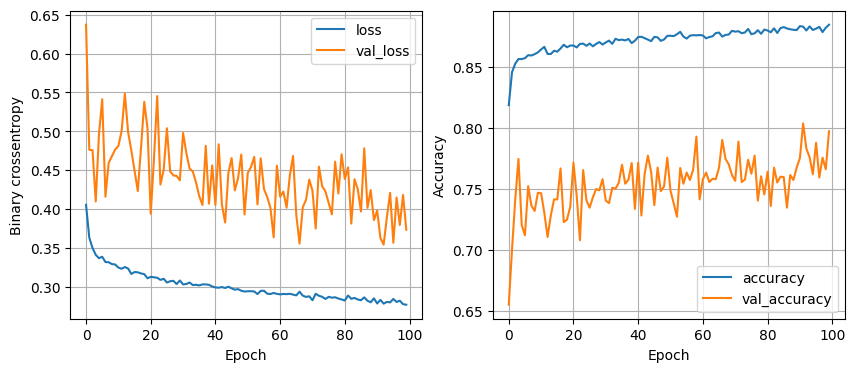

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8743 - loss: 0.3195
63 nodes, 0.2 dropout,0.005 lr, 64 batch
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7800 - loss: 0.4655 - val_accuracy: 0.7005 - val_loss: 0.5772
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8377 - loss: 0.3789 - val_accuracy: 0.6999 - val_loss: 0.5765
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8471 - loss: 0.3587 - val_accuracy: 0.7361 - val_loss: 0.5059
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8546 - loss: 0.3448 - val_accuracy: 0.7144 - val_loss: 0.5322
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8606 - loss: 0.3327 - val_accuracy: 0.7463 - val_loss: 0.4718
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8547 - loss: 0.3367 - val_accuracy: 0.6924 - val_loss: 0.5839
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8550 - loss: 0.3371 - val_accuracy: 0.7287 

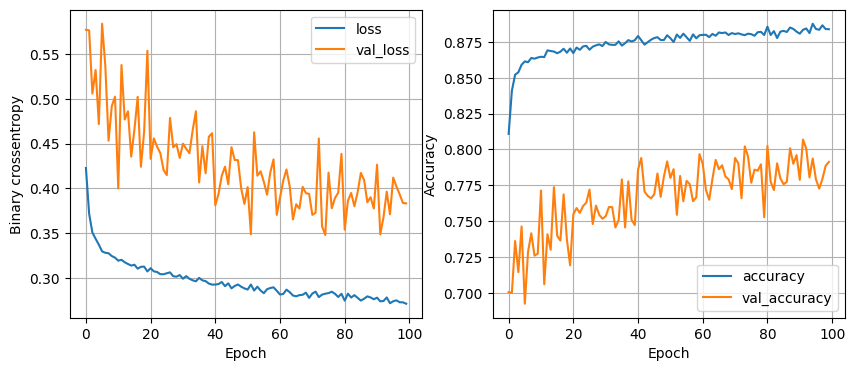

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8721 - loss: 0.3230
63 nodes, 0.2 dropout,0.005 lr, 128 batch
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7529 - loss: 0.4949 - val_accuracy: 0.6619 - val_loss: 0.6252
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8384 - loss: 0.3801 - val_accuracy: 0.7182 - val_loss: 0.5198
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8558 - loss: 0.3498 - val_accuracy: 0.7093 - val_loss: 0.5340
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8544 - loss: 0.3494 - val_accuracy: 0.7629 - val_loss: 0.4578
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8616 - loss: 0.3354 - val_accuracy: 0.7676 - val_loss: 0.4278
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8644 - loss: 0.3250 - val_accuracy: 0.7138 - val_loss: 0.5273
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8641 - loss: 0.3277 - val_accuracy: 0.7547 - val_loss: 0

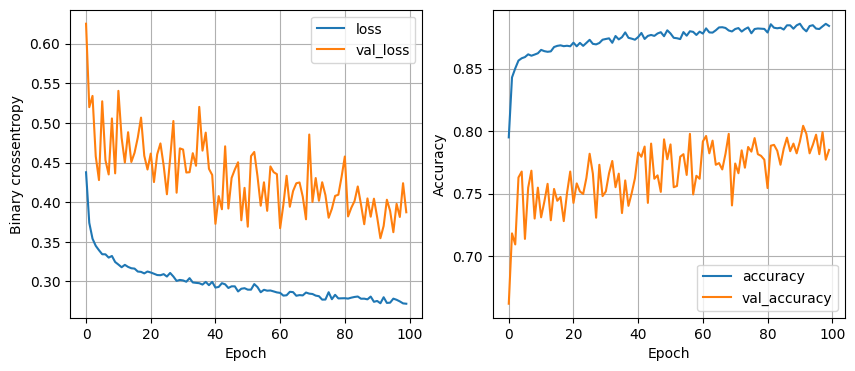

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8704 - loss: 0.3077
63 nodes, 0.2 dropout,0.001 lr, 32 batch
Epoch 1/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7470 - loss: 0.5150 - val_accuracy: 0.6904 - val_loss: 0.5680
Epoch 2/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8233 - loss: 0.3904 - val_accuracy: 0.6846 - val_loss: 0.5894
Epoch 3/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8427 - loss: 0.3686 - val_accuracy: 0.7436 - val_loss: 0.4859
Epoch 4/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8455 - loss: 0.3636 - val_accuracy: 0.7381 - val_loss: 0.5052
Epoch 5/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8439 - loss: 0.3598 - val_accuracy: 0.7154 - val_loss: 0.5394
Epoch 6/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8464 - loss: 0.3597 - val_accuracy: 0.7547 - val_loss: 0.4810
Epoch 7/100
369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8499 - loss: 0.3559 - val_accuracy: 0.7158 

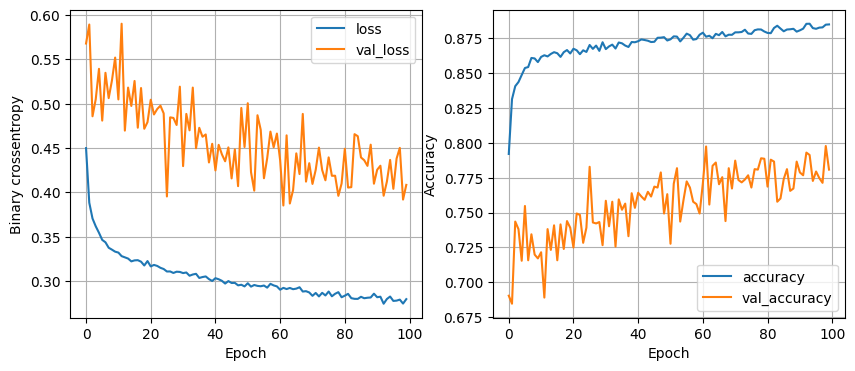

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8725 - loss: 0.3027
63 nodes, 0.2 dropout,0.001 lr, 64 batch
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7407 - loss: 0.5346 - val_accuracy: 0.6585 - val_loss: 0.5817
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8204 - loss: 0.4068 - val_accuracy: 0.6694 - val_loss: 0.5951
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8257 - loss: 0.3948 - val_accuracy: 0.6873 - val_loss: 0.5679
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8404 - loss: 0.3774 - val_accuracy: 0.6995 - val_loss: 0.5610
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8470 - loss: 0.3596 - val_accuracy: 0.7642 - val_loss: 0.4501
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8468 - loss: 0.3636 - val_accuracy: 0.7259 - val_loss: 0.5155
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8504 - loss: 0.3540 - val_accuracy: 0.7304 

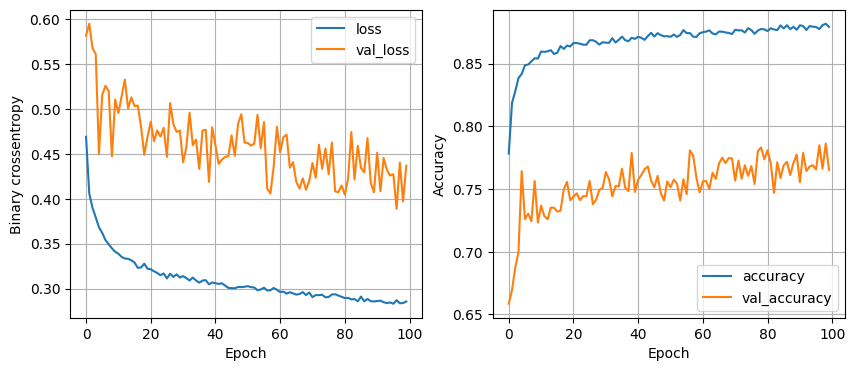

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8704 - loss: 0.3066
63 nodes, 0.2 dropout,0.001 lr, 128 batch
Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7163 - loss: 0.5738 - val_accuracy: 0.6562 - val_loss: 0.6128
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8112 - loss: 0.4156 - val_accuracy: 0.6633 - val_loss: 0.6060
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8209 - loss: 0.4028 - val_accuracy: 0.6965 - val_loss: 0.5649
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8333 - loss: 0.3847 - val_accuracy: 0.7127 - val_loss: 0.5440
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8409 - loss: 0.3751 - val_accuracy: 0.7185 - val_loss: 0.5476
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8476 - loss: 0.3537 - val_accuracy: 0.7148 - val_loss: 0.5315
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8476 - loss: 0.3606 - val_accuracy: 0.7293 - val_loss: 0

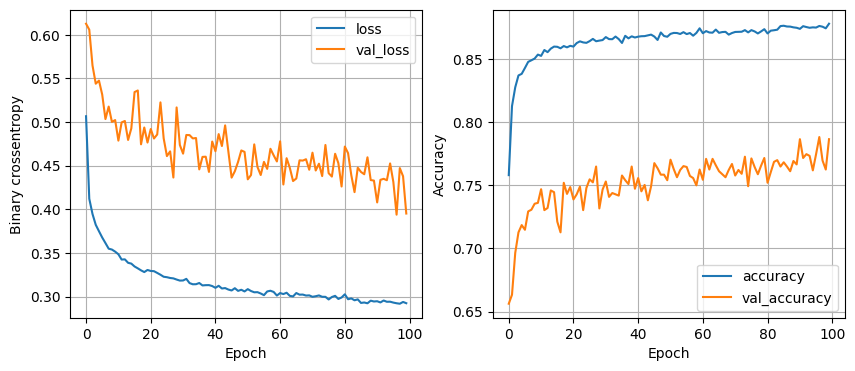

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8741 - loss: 0.3145


In [42]:
least_val_loss=float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16,32,63]:
  for dropout_prob in [0,0.2]:
    for learning_rate in [0.1,0.005,0.001]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes} nodes, {dropout_prob} dropout,{learning_rate} lr, {batch_size} batch")
        model,history = train_model(X_train,Y_train,num_nodes,dropout_prob,learning_rate,batch_size,epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid,Y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss= val_loss
          least_loss_model = model

In [51]:
Y_pred =least_loss_model.predict(X_test)
Y_pred = (Y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(Y_test,Y_pred))

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1353
           1       0.88      0.94      0.91      2451

    accuracy                           0.88      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.88      0.88      0.87      3804



# Linear Regression